<a href="https://colab.research.google.com/github/cpu-once/NationalScienceandTechnologyBigDataAnalysis/blob/main/bigdataExam_chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# colab 한글 폰트 설정을 위한 현재 설정된 폰트 확인
import matplotlib.font_manager as fm  # to manage font

# font file들의 경로를 가지는 list 반환.
sys_fonts=fm.findSystemFonts()
print(f"# of sys_font_family : {len(sys_fonts)}")
print(sys_fonts)

# Debian, Ubuntu등에서 사용가능한 Nanum fonts 확인.
nanum_fonts = [f for f in sys_fonts if 'Nanum' in f]
print(f"# of nanum_font family: {len(nanum_fonts)}")
print(nanum_fonts)

# 현재 FontEntry들을 출력 (ttf파일 기준)
ttf_fonts = fm.fontManager.ttflist
print(f"# of ttf_font entries: {len(ttf_fonts)}")
# for f in ttf_fonts:
#   print(f.name)

# 현재 Nanum font관련 FontEntry들을 출력 (ttf파일 기준)
nanum_font_entries = [f for f in ttf_fonts if 'Nanum' in f.name]
print(f"# of nanum ttf_font entries: {len(nanum_font_entries)}")
# for f in ttf_fonts:

# of sys_font_family : 29
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/true

In [50]:
# 나눔 폰트, Matplotlib 폰트 매니저에 추가
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [51]:
# 현재 폰트 확인
import matplotlib as mpl

print(f"font.family: {mpl.rcParams['font.family']}"),
print(f"font.size  : {mpl.rcParams['font.size']}")

font.family: ['NanumGothic']
font.size  : 12.0


In [52]:
# pandas의 read_csv를 이용하여 csv 파일을 데이터프레임 형태로 불러오기
from pandas import read_csv
titanic = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv')
print(titanic.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [53]:
# 데이터 기본 정보 확인

# PassengerId : 승객 고유 번호
# Survived :생존 여부, 1=생존, 0=사망
# Pclass :티켓 클래스
# Cabin : 객실 번호
# Embarked : 승선항, C=Cherbourg, Q=Queenstown, S=Southampton -> 질적 변수로 볼 수 있고
# Age, SibSp(동승한 형제 자매 및 배우자의 수)
# Parch(동승한 부모 및 자녀의 수)
# Fare(양적 변수)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [54]:
# 결측치를 살펴보면, Age, Cabin, Embarked는 결측치가 있는 것으로 확인 된다.
# Cabin은 결측치가 과반수 이상이기 때문에 특성을 삭제하기로 하며,
# 이와 더불어 결측치는 없지만 수치적 의미가 없는 것으로 보이는 PassengerId도 삭제한다.

# 변수 별 데이터 타입을 살펴 보면, 수치로 표현된 데이터의 타입은 int64(정수), float64(실수)
# 로 텍스트로 표현된 데이터의 타입은 object로 되어 있는 것을 알 수 있다.

# 질적변수임에도 불구하고 양적변수로 표시된 Survived, Pclass와 나머지 질적 변수들의
# 데이터 타입은 아래와 같이 category 타입으로 변경할 수 있다.

# feature 삭제
del_feat = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feat, axis=1)

# 질적변수의 데이터 타입을 category로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']

for col in qual:
  titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


In [55]:
# 양적변수에 대해서는
# count (데이터 개수)
# mean (평균)
# std (표준 편차)
# min (최솟값)
# 25% (1사분위수)
# 50% (2사분위수)
# 75% (3사분위수)
# max (최댓값)

# .describe()의 파라미터 include를 'all' 로 설정하면 모든 데이터 타입의 변수에 대해 기술 통계를
# 제공하고, include=['float64', 'int64']와 같이 특정 데이터 타입의 리스트를 입력하면
# 해당 데이터 타입에 대한 기술통계만 확인할 수 있다.
print(titanic.describe(include=['float64', 'int64']))

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [56]:
# 질적변수에 대해서는
# count (데이터 개수)
# unique (범주형 변수의 level 개수)
# top (빈도가 가장 높은 level)
# freq (top leve의 빈도)

#Ticket은 681개라는 과도한 level을 가지고 있는 것을 확인하였고, 질적변수로서 분석할 의미가
# 없다고 판단하여 분석에서 삭제하기로 한다.

print(titanic.describe(include=['category']))

        Survived  Pclass                         Name   Sex Ticket Embarked
count        891     891                          891   891    891      889
unique         2       3                          891     2    681        3
top            0       3  van Melkebeke, Mr. Philemon  male   1601        S
freq         549     491                            1   577      7      644


In [57]:
# 도수분포표
from pandas import DataFrame
freq = DataFrame(titanic['Survived'].value_counts())
print(freq)

          count
Survived       
0           549
1           342


In [58]:
# 상대도수분포표 추가
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq = freq.rename(columns={'count' : '도수'}) # 'count' 를 '도수'로 컬럼명 변경
print(freq)

           도수      상대도수
Survived               
0         549  0.616162
1         342  0.383838


In [59]:
# 상관계수, 스피어만 순위상관계수, 켄달의 타우

from scipy.stats import spearmanr, kendalltau
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print("스피어만 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

corr2, p2 = kendalltau(titanic['Survived'], titanic['Pclass'])
print("켄달타우 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr2,p2))

스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


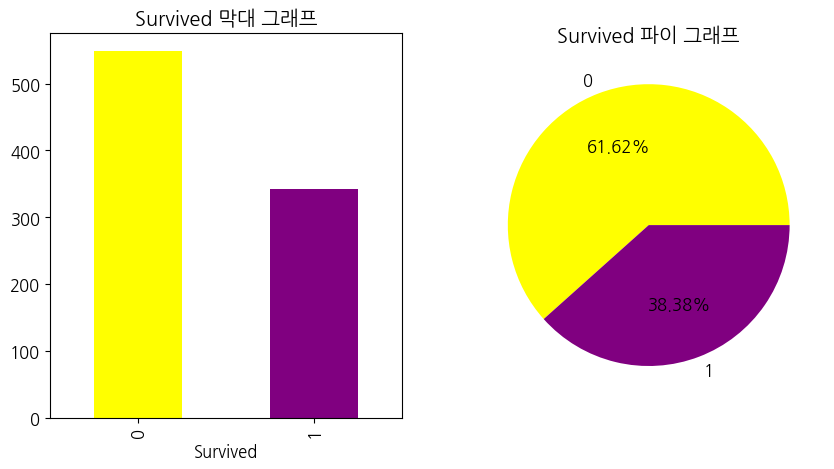

In [60]:
# 질적변수 탐색 시각화

#plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5) # 그래프 그리기
plt.rcParams["font.family"] = 'NanumGothic' # 글꼴
plt.rcParams["font.size"] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기
fig, ax = plt.subplots(1,2, figsize=(10, 5)) # 그래프 구성

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple'])

# 파이 그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, autopct = "%.2f%%", colors = ['yellow', 'purple'])
plt.show()

In [61]:
# 계급의 개수를 지정하여 도수분포표 생성
# Pandas라이브러리의 cut을 사용하여, Age 변수를 5구간으로 나누고,
# .values_counts()를 적용하여 구간별 도수를 구하고
# .reset_index()를 통해 인덱스를 리셋한 후
# 구간별로 나눈 Age를 계급으로한 구간별로 오름차순으로 정렬

# 상대도수를 구하기 위해 .apply(lambda x: )를 사용하여 각 도수들(x)을 도수의 합(sum)
# 으로 나누었다.

from pandas import cut
!pip install stemgraphic

result1 = cut(titanic['Age'], bins=5)
freq1 = DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'Age' :'계급', 'count' : '도수'}).sort_values(by='계급')

# freq1의 상대 도수분포표 추가
freq1['상대도수'] = freq1['도수'].apply(lambda x: x / freq1['도수'].sum())
print(freq1)




                 계급   도수      상대도수
2    (0.34, 16.336]  100  0.140056
0  (16.336, 32.252]  346  0.484594
1  (32.252, 48.168]  188  0.263305
3  (48.168, 64.084]   69  0.096639
4    (64.084, 80.0]   11  0.015406


In [62]:
# 계산적 대푯값
# 계산적 대푯값에는 산술평균, 기하평균, 조화평균, 절사평균, 평방평균 등이 있다.
# 산술평균 : 주어진 수의 합을 수의 개수로 나눈 값
# 기하평균 : n 개의 양수의 곱의 n제곱근 값으로서, 물가 변동률, 경제성장률, 임금 인상률 드 시간적으로 변화하는 비율의 대푯값
# 조화평균 : 역수의 산술평균의 역수로서, 평균 작업 속도, 평균 속도 등 시간적으로 계속 변화하는 속도의 대푯값
# 절사평균 : 자료의 총 개수에서 일정 비율만큼 가장 큰 부분과 작은 부분을 제거한 후 산출한 산술 평균
# 평방평균 : 주어진 수를 각각 제곱하여 산술평균을 구하고 제곱근을 취한 것으로서, 비정상적 관측치의 영향을 부각시킬 때 사용

from scipy.stats.mstats import gmean, hmean, tmean
import numpy as np

example = [1, 2, 3, 4, 5, 10]
print("산술 평균: {:.2f}".format(np.mean(example)))
print("기하 평균: {:.2f}".format(gmean(example)))
print("조화 평균: {:.2f}".format(hmean(example)))

# 1이상 5이하의 범위를 벗어나는 값을 제외
print("절사 평균: {:.2f}".format(tmean(example, (1,5))))

# 평방평균
qm = np.sqrt(np.mean(np.array(example)**2)) #list를 array로 변경한 후 계산
print("평방 평균: {:.2f}".format(qm))



산술 평균: 4.17
기하 평균: 3.26
조화 평균: 2.52
절사 평균: 3.00
평방 평균: 5.08


In [63]:
# 위치적 대푯값
# 위치적 대푯값으로는 중위수(Median), 최빈값(Modes), 사분위수(Quartile),
# 분위수(Quantile), 백분위수(Percentile)가 있다.

import numpy as np
print("중위수: ", titanic['Fare'].median())
print("최빈값: ", titanic['Fare'].mode()[0])
print("1사분위수: ", titanic['Fare'].quantile(q=0.25) )
print("2사분위수: ", titanic['Fare'].quantile(q=0.5))
print("3사분위수: ", titanic['Fare'].quantile(q=0.75))
print("50백분위수: ", np.percentile(titanic['Fare'], 50))
print("75백분위수: ", np.percentile(titanic['Fare'], 75))



중위수:  14.4542
최빈값:  8.05
1사분위수:  7.9104
2사분위수:  14.4542
3사분위수:  31.0
50백분위수:  14.4542
75백분위수:  31.0


In [64]:
# 절대적 산포도
# 절대적 산포도로는
# 범위 : 관측값의 최대값에서 최소값을 뺀 값
# 사분위범위 (IQR) : 3사분위수에서 1사분위수를 뺀 값
# 평균편차 (MD - Mean devation) : 편차의 절댓값의 산술평균
# 사분편차 (QD - Quartile deviation) : 사분위범위 / 2
# 분산 (Variance) : 편차의 제곱의 산술 평균
# 표준편차 (SD - Standard deviation) : 분산의 양의 제곱근
# ddof는 delta degrees of freedom으로서 자유도(Degrees of freedom을 결정하는 파라미터 이다.
# ddof = 0 으로 설정하면 (n-0)을 자유도로, ddof =1 로 설정하면 (n-1)을 자유도로 설정한다.
# 따라서, ddof = 0은 모분산 혹은 모표준편차를 구할 때
# ddof = 1은 표본 분산 혹은 표본표준편차를 구할 때 사용된다.

print("범위: %.2f" %(titanic['Fare'].max() - titanic['Fare'].min() ))
iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
print("사분위범위: %.2f" %(iqr), "\n")

md = np.mean(np.abs(np.array(titanic['Fare']) - np.mean(titanic['Fare'])))
print("평균편차: %.2f" %(md))
print("사분편차: %.2f" %(iqr/2), "\n")

print("모분산: %.2f" %(titanic['Fare'].var(ddof=0)))
print("표본분산: %.2f" %(titanic['Fare'].var(ddof=1)))
print("모표준편차: %.2f" %(titanic['Fare'].std(ddof=0)))
print("표본표준편차: %.2f" %(titanic['Fare'].std(ddof=1)))



범위: 512.33
사분위범위: 23.09 

평균편차: 28.16
사분편차: 11.54 

모분산: 2466.67
표본분산: 2469.44
모표준편차: 49.67
표본표준편차: 49.69


In [65]:
# 상대적 산포도

# 상대적 산포도에는 사분위 편차계수 (CQD, Coefficient of quartile deviation) : 사분편차를 중앙값으로 나눈 값
# 평균편차계수 (CMD, Coefficient of mean deviation) : 평균편차를 산술평균으로 나눈 값
# 변동 계수 (CV, Coefficient of variance) : 표준편차를 산술평균으로 나눈 값. 자료의 단위가 다르거나 평균의 차이가 클 때 평균에 대한 표준편차의 상대적 크기를 비교

print("사분위편차계수: %.2f" %(iqr/2/titanic['Fare'].median()))
print("평균편차계수: %.2f" %(md/titanic['Fare'].mean()))
print("모집단 변동계수: %.2f" %(titanic['Fare'].std(ddof=0)/titanic['Fare'].mean()))
print("표본집단 변동계수: %.2f" %(titanic['Fare'].std(ddof=1)/titanic['Fare'].mean()))



사분위편차계수: 0.80
평균편차계수: 0.87
모집단 변동계수: 1.54
표본집단 변동계수: 1.54


In [66]:
# 왜도, 첨도

# 왜도
# 왜도(Skewness는 관측값 분포의 비대칭 정도를 나타낸다.
# 왜도가 음수일 경우 분포의 왼쪽 부분에 긴 꼬리를 가지며,
# 왜도가 양수일 경우 오른쪽 부분에 긴 꼬리를 가진다.
# 정규분포의 왜도는 0이다.

# 첨도
# 첨도(Kurtosis)는 관측값 분포의 모양이 얼마나 뾰족한지를 나타낸다.
# 극단적인 편차나 이상치가 많을 수록 큰 값을 나타낸다.
# 첨도가 3보다 큰 경우 정규분포보다 뾰족하고 꼬리가 얇은 분포를 가지며
# 첨도가 3보다 작은 경우 정규분포보다 뾰족하지 않고 두꺼운 분포를 가진다.

# Pandas와 Scipy의 왜도와 첨도는 다소 다르게 나타나는데, Pandas는 bias 수정이 적용되지 않은 상태이고
# Scipy는 bias 수정을 적용했기 때문이다.
# Scipy에서 bias = Flase로 설정하면 둘은 동일한 결과를 얻게 된다.

# pandas
print("왜도: %.3f, 첨도: %3.f" %(titanic['Fare'].skew(), titanic['Fare'].kurt()))

# scipy
from scipy.stats import skew, kurtosis
ssF = skew(titanic['Fare'], bias=False)
skF = kurtosis(titanic['Fare'], bias=False)
ssT = skew(titanic['Fare'], bias=True)
skT = kurtosis(titanic['Fare'], bias=True)
print("왜도: %.3f(%.3f), 첨도: %.3f(%.3f)" %(ssF, ssT, skF, skT))



왜도: 4.787, 첨도:  33
왜도: 4.787(4.779), 첨도: 33.398(33.204)


In [67]:
# 상관계수: 피어슨의 적률 상관계수
# 피어슨(Pearson)의 적률상관계수는 양적변수의 상관관계를 나타낸다.
# 예시의 코드는 Age와 Fare의 상관계수는 0.093인데 이는 상관성이 거의 없다고 볼 수 있다.
# 한편, 해당 상관계수의 p-value 0.013을 보면 0.05보다 작기 때문에 표본의 상관계수가
# 모상관계수 0과 차이가 없다는 귀무가설을 기각할 수 있다.
# 따라서 해당 상관계수는 통계적으로 유의하다고 본다.

from scipy.stats import pearsonr
#PassengerId, Cabin이 없는 titanic에서 추가로 Age의 결측치가 있는 행을 삭제
titanic = titanic.dropna(axis=0)
corr, p = pearsonr(titanic['Age'], titanic['Fare'])
print("피어슨 상관계수 {:.3f}, p-value {:.3f}".format(corr, p))



피어슨 상관계수 0.093, p-value 0.013


In [68]:
# 양적변수 탐색 시각화
# import stemgraphic
# stemgraphic.stem_graphic(titanic['Age'])
# plt.show()



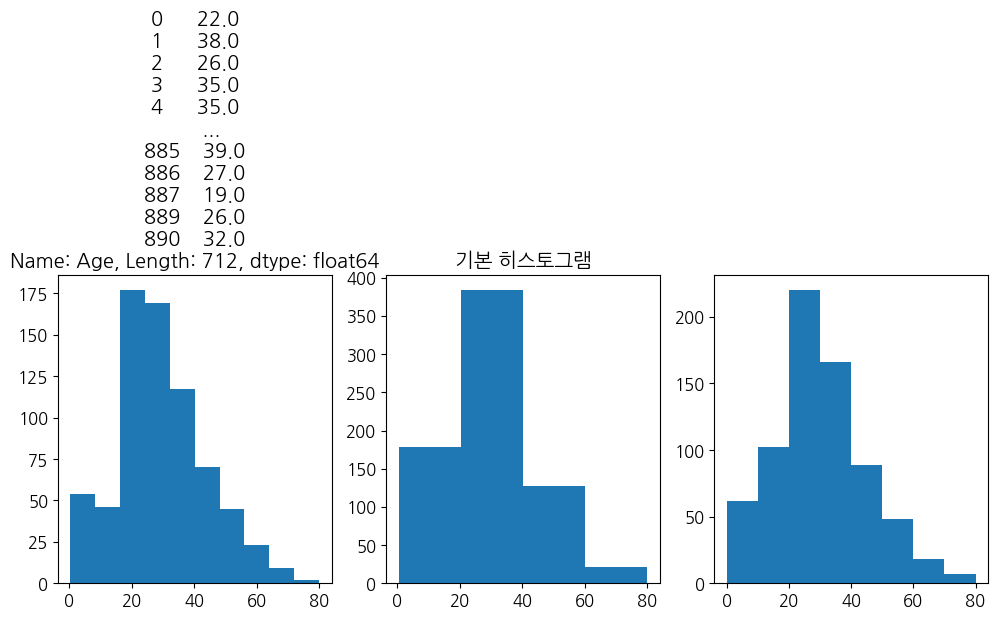

In [69]:
# 히스토그램은 도수분포의 상태를 도수분포표의 계급과 도수를 이용하여 기둥 모양으로
# 나타낸 그래프이다.
# x축에는 연속형 변수의 계급을 표시하고, y축에는 빈도를 표시한다.

# 기본 히스토그램
# 계급의 개수를 설정한 히스토그램
# 계급의 범위를 설정한 히스토그램
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].hist(titanic['Age'])
ax[0].set_title(titanic['Age'])
ax[1].set_title("기본 히스토그램")
ax[1].hist(titanic['Age'], bins=4) #bin_number 설정
ax[2].hist(titanic['Age'], bins=[i for i in range(0,90,10)]) # bin edges 설정
plt.show()

In [69]:
# 오자이브(Ogive)는 누적도수다각형의 각 계급구간의 누적 도수에 대응하는 기둥의 맨 위 중간점들을 직선으로 연결했을 때 나타나는 그래프이다.